In [2]:
!ls ..

Problem_statement.pdf  Segments.xlsx  hackathon.zip  notebooks	train.csv


## Feature Importance

In [1]:
import pandas as pd
# from tqdm import tqdm 
# train = pd.read_csv('../train.csv')
# train=train.dropna()
# train["created"] = pd.to_datetime(train["created"], format='%Y-%m-%d %H:%M:%S', errors='ignore')
# train['shift']=train.apply(lambda x: int(float(str(x['shift']).replace("MSK",""))) if str(x['shift']).replace("MSK","")!="" else 0 , axis=1)

In [11]:
train.head()

,Segment,gamecategory,subgamecategory,bundle,shift,oblast,city,os,osv,created_year,...,created_year_new,created_month_new,created_day_new,created_hour_new,created_minute_new,created_second_new,day_of_week,day_of_week_new,city_population,bundle_pref
0,4,Games,Racing,com.madout.big,6,Забайкальский Край,Чита,android,10.0,2021,...,2021,7,6,0,7,40,0,1,-1.0,com madout
2,5,Games,Arcade,com.orbitalknight.ridiculousfreekick,0,Санкт-Петербург,Санкт-Петербург,android,9.0,2021,...,2021,8,4,13,34,29,2,2,5028000.0,com orbitalknight
5,5,Games,Puzzle,com.hwg.sos,0,Татарстан,Альметьевск,android,7.1,2021,...,2021,9,18,9,44,24,5,5,140437.0,com hwg
6,4,Games,Arcade,com.hikergames.arcadehunter,0,Москва,Москва,android,11.0,2021,...,2021,8,2,8,52,24,0,0,10381222.0,com hikergames
7,5,Games,Card,com.lemongame.klondike.solitaire,0,Санкт-Петербург,Санкт-Петербург,android,8.1.0,2021,...,2021,9,18,2,36,11,5,5,5028000.0,com lemongame


In [12]:
train["bundle_pref"]=train.apply(lambda x: " ".join(str(x["bundle"]).lower().strip().split(".")[:2]) , axis=1)

In [14]:
d_=train["bundle_pref"].value_counts()
print(d_)

com fugo                          675354
com axlebolt                      503385
net wargaming                     491177
com yourstoryinteractive          440092
com smallgiantgames               417958
                                   ...  
com denis                              1
alotv wordguessinggame                 1
com godzila_vs_kong_stickerapp         1
com gandg                              1
1529866519                             1
Name: bundle_pref, Length: 24276, dtype: int64


In [ ]:
def sum_value(df):
    for i in df.columns.values:
        print(i)
        print(df[i].value_counts())
        print(df[i].isna().sum())
        print("______________________________________")

In [77]:
def preprocessing_1():
    train = pd.read_csv('../train.csv')
    train["os"]=train.apply(lambda x: str(x["os"]).lower().strip() , axis=1)
    train = train.drop(train[train['os'] == "nan"].index)
    train=train.dropna()
    # train.to_csv("set_ios_clean_nun.csv")
    train["created"] = pd.to_datetime(train["created"], format='%Y-%m-%d %H:%M:%S', errors='ignore')
    train['created_year'] = train["created"].dt.year
    train['created_month'] = train["created"].dt.month
    train['created_day'] = train["created"].dt.day
    train['created_hour'] = train["created"].dt.hour
    train['created_minute'] = train["created"].dt.minute
    train['created_second'] = train["created"].dt.second
    del train["created"]
    del train["bundle"]
    train['shift']=train.apply(lambda x: int(float(str(x['shift']).replace("MSK",""))) if str(x['shift']).replace("MSK","")!="" else 0 , axis=1)
    train['Segment']=train.apply(lambda x: int(x["Segment"]), axis=1)
    train = train.drop_duplicates()
    return train
preprocessing_1().to_csv("../preproc_1.csv", index=False)

In [78]:
def preprocessing_3():
    train = pd.read_csv('../train.csv')
    train["os"]=train.apply(lambda x: str(x["os"]).lower().strip() , axis=1)
    train = train.drop(train[train['os'] == "nan"].index)
    train=train.dropna()
    train.loc[train['Segment'] == 1, 'Segment'] = 2
    # train.to_csv("set_ios_clean_nun.csv")
    train["created"] = pd.to_datetime(train["created"], format='%Y-%m-%d %H:%M:%S', errors='ignore')
    train['shift']=train.apply(lambda x: int(float(str(x['shift']).replace("MSK",""))) if str(x['shift']).replace("MSK","")!="" else 0 , axis=1)
    
    train['created_year'] = train["created"].dt.year
    train['created_month'] = train["created"].dt.month
    train['created_day'] = train["created"].dt.day
    train['created_hour'] = train["created"].dt.hour
    train['created_minute'] = train["created"].dt.minute
    train['created_second'] = train["created"].dt.second
    del train["created"]
    del train["bundle"]
    
    train['Segment']=train.apply(lambda x: int(x["Segment"]), axis=1)
    train = train.drop_duplicates()
    return train
a=preprocessing_3()

In [15]:
vk=pd.read_csv("../vk_dataset.csv")

In [16]:
vk["population"]=vk.region.apply(lambda x: population_dict.get(x, -1))

In [17]:
vk.head()

,phone,sex,region,age,count,population
0,Android high price,man,Москва,0.0,9000,10381222
1,Android high price,woman,Москва,0.0,7900,10381222
2,Android high price,woman,Москва,1.0,13000,10381222
3,Android high price,man,Москва,1.0,28000,10381222
4,Android high price,man,Москва,2.0,34000,10381222


In [18]:
vk.to_csv("../vk_dataset_new.csv", index=False)

In [4]:
train.head()

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
0,4,Games,Racing,com.MadOut.BIG,2021-07-05 18:07:40,6,Забайкальский Край,Чита,android,10.0
2,5,Games,Arcade,com.orbitalknight.ridiculousfreekick,2021-08-04 13:34:29,0,Санкт-Петербург,Санкт-Петербург,android,9.0
5,5,Games,Puzzle,com.hwg.sos,2021-09-18 09:44:24,0,Татарстан,Альметьевск,android,7.1
6,4,Games,Arcade,com.hikergames.ArcadeHunter,2021-08-02 08:52:24,0,Москва,Москва,android,11.0
7,5,Games,Card,com.lemongame.klondike.solitaire,2021-09-18 02:36:11,0,Санкт-Петербург,Санкт-Петербург,android,8.1.0


In [2]:
import pickle
with open('../population_dict.pickle', 'rb') as f:
    population_dict = pickle.load(f)
    


def preprocessing_5():
    train = pd.read_csv('../train.csv')
    train["data_type"]=train.apply(lambda x: 1 if (("I" in str(x["os"])) or ("A" in str(x["os"]))) else 0 , axis=1)
    train = train.drop(train[train['os'] == "nan"].index)
    train["os"]=train.apply(lambda x: str(x["os"]).lower().strip() , axis=1)

    train=train.dropna()
    train.loc[train['Segment'] == 1, 'Segment'] = 2
    
    # train = pd.read_csv('../train.csv')
    train=train.dropna()
    train['shift']=train.apply(lambda x: int(float(str(x['shift']).replace("MSK",""))) if str(x['shift']).replace("MSK","")!="" else 0 , axis=1)
    train["created"] = pd.to_datetime(train["created"], format='%Y-%m-%d %H:%M:%S', errors='ignore')
    train["new_created"]=train.apply(lambda x: x["created"]+pd.Timedelta(hours=x["shift"]) , axis=1)
    
    train['created_year'] = train["created"].dt.year
    train['created_month'] = train["created"].dt.month
    train['created_day'] = train["created"].dt.day
    train['created_hour'] = train["created"].dt.hour
    train['created_minute'] = train["created"].dt.minute
    train['created_second'] = train["created"].dt.second
    
    train['created_year_new'] = train["new_created"].dt.year
    train['created_month_new'] = train["new_created"].dt.month
    train['created_day_new'] = train["new_created"].dt.day
    train['created_hour_new'] = train["new_created"].dt.hour
    train['created_minute_new'] = train["new_created"].dt.minute
    train['created_second_new'] = train["new_created"].dt.second
    
    train['day_of_week'] = train.apply(lambda x: x["created"].weekday(), axis=1)
    train['day_of_week_new'] = train.apply(lambda x: x["new_created"].weekday(), axis=1)
    
    train['city_population'] = train.city.apply(lambda x: population_dict.get(x, -1))

    del train["created"]
    del train["new_created"]
    
    train["bundle"]=train.apply(lambda x: str(x["bundle"]).lower().strip() , axis=1)

    train['Segment']=train.apply(lambda x: int(x["Segment"]), axis=1)
    train = train.drop_duplicates()
    train['city_population'] = train['city_population'].fillna(-1)
    return train
train=preprocessing_5()
train.to_csv("../preproc_5.csv", index=False)

In [76]:
def preprocessing_2():
    train = pd.read_csv('../train.csv')
    train["os"]=train.apply(lambda x: str(x["os"]).lower().strip() , axis=1)
    train = train.drop(train[train['os'] == "nan"].indsum_value    train=train.dropna()
    # train.to_csv("set_ios_clean_nun.csv")
    train["created"] = pd.to_datetime(train["created"], format='%Y-%m-%d %H:%M:%S', errors='ignore')
    train['created_year'] = train["created"].dt.year
    train['created_month'] = train["created"].dt.month
    train['created_day'] = train["created"].dt.day
    train['created_hour'] = train["created"].dt.hour
    train['created_minute'] = train["created"].dt.minute
    train['created_second'] = train["created"].dt.second
    del train["created"]
    train['shift']=train.apply(lambda x: int(float(str(x['shift']).replace("MSK",""))) if str(x['shift']).replace("MSK","")!="" else 0 , axis=1)
    train['Segment']=train.apply(lambda x: int(x["Segment"]), axis=1)
    train = train.drop_duplicates()
    return train
preprocessing_2().to_csv("../preproc_2.csv", index=False)

In [25]:
df = pd.read_csv('../preproc_5.csv')
df.head()

,Segment,gamecategory,subgamecategory,bundle,shift,oblast,city,os,osv,created_year,...,created_second,created_year_new,created_month_new,created_day_new,created_hour_new,created_minute_new,created_second_new,day_of_week,day_of_week_new,city_population
0,4,Games,Racing,com.madout.big,6,Забайкальский Край,Чита,android,10.0,2021,...,40,2021,7,6,0,7,40,0,1,-1.0
1,5,Games,Arcade,com.orbitalknight.ridiculousfreekick,0,Санкт-Петербург,Санкт-Петербург,android,9.0,2021,...,29,2021,8,4,13,34,29,2,2,5028000.0
2,5,Games,Puzzle,com.hwg.sos,0,Татарстан,Альметьевск,android,7.1,2021,...,24,2021,9,18,9,44,24,5,5,140437.0
3,4,Games,Arcade,com.hikergames.arcadehunter,0,Москва,Москва,android,11.0,2021,...,24,2021,8,2,8,52,24,0,0,10381222.0
4,5,Games,Card,com.lemongame.klondike.solitaire,0,Санкт-Петербург,Санкт-Петербург,android,8.1.0,2021,...,11,2021,9,18,2,36,11,5,5,5028000.0


In [26]:
df.isna().sum()

Segment               0
gamecategory          0
subgamecategory       0
bundle                0
shift                 0
oblast                0
city                  0
os                    0
osv                   0
created_year          0
created_month         0
created_day           0
created_hour          0
created_minute        0
created_second        0
created_year_new      0
created_month_new     0
created_day_new       0
created_hour_new      0
created_minute_new    0
created_second_new    0
day_of_week           0
day_of_week_new       0
city_population       0
dtype: int64

In [27]:
# columns_not_categorical = ["created_minute", "created_second", "created_hour", "created_year", "created_month",  "created_day", "shift" , "Segment"]
# target="Segment"
# col=list(df.columns)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
df.to_csv("../all_prepared_for_learn_prep_5.csv", index=False)

In [21]:
df=pd.read_csv("../all_prepared_for_learn_prep_5.csv")

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [29]:
target="Segment"
model = ensemble.RandomForestClassifier(n_estimators=10, max_depth=50)
model.fit(df[df.columns[df.columns != target]], df[target])

RandomForestClassifier(max_depth=50, n_estimators=10)

In [30]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != target],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

In [31]:
df_plot

,features,importances
2,bundle,0.107870
11,created_hour,0.103750
19,created_second_new,0.077198
13,created_second,0.077143
17,created_hour_new,0.070052
9,created_month,0.066603
12,created_minute,0.062000
18,created_minute_new,0.061531
1,subgamecategory,0.054827
7,osv,0.045157


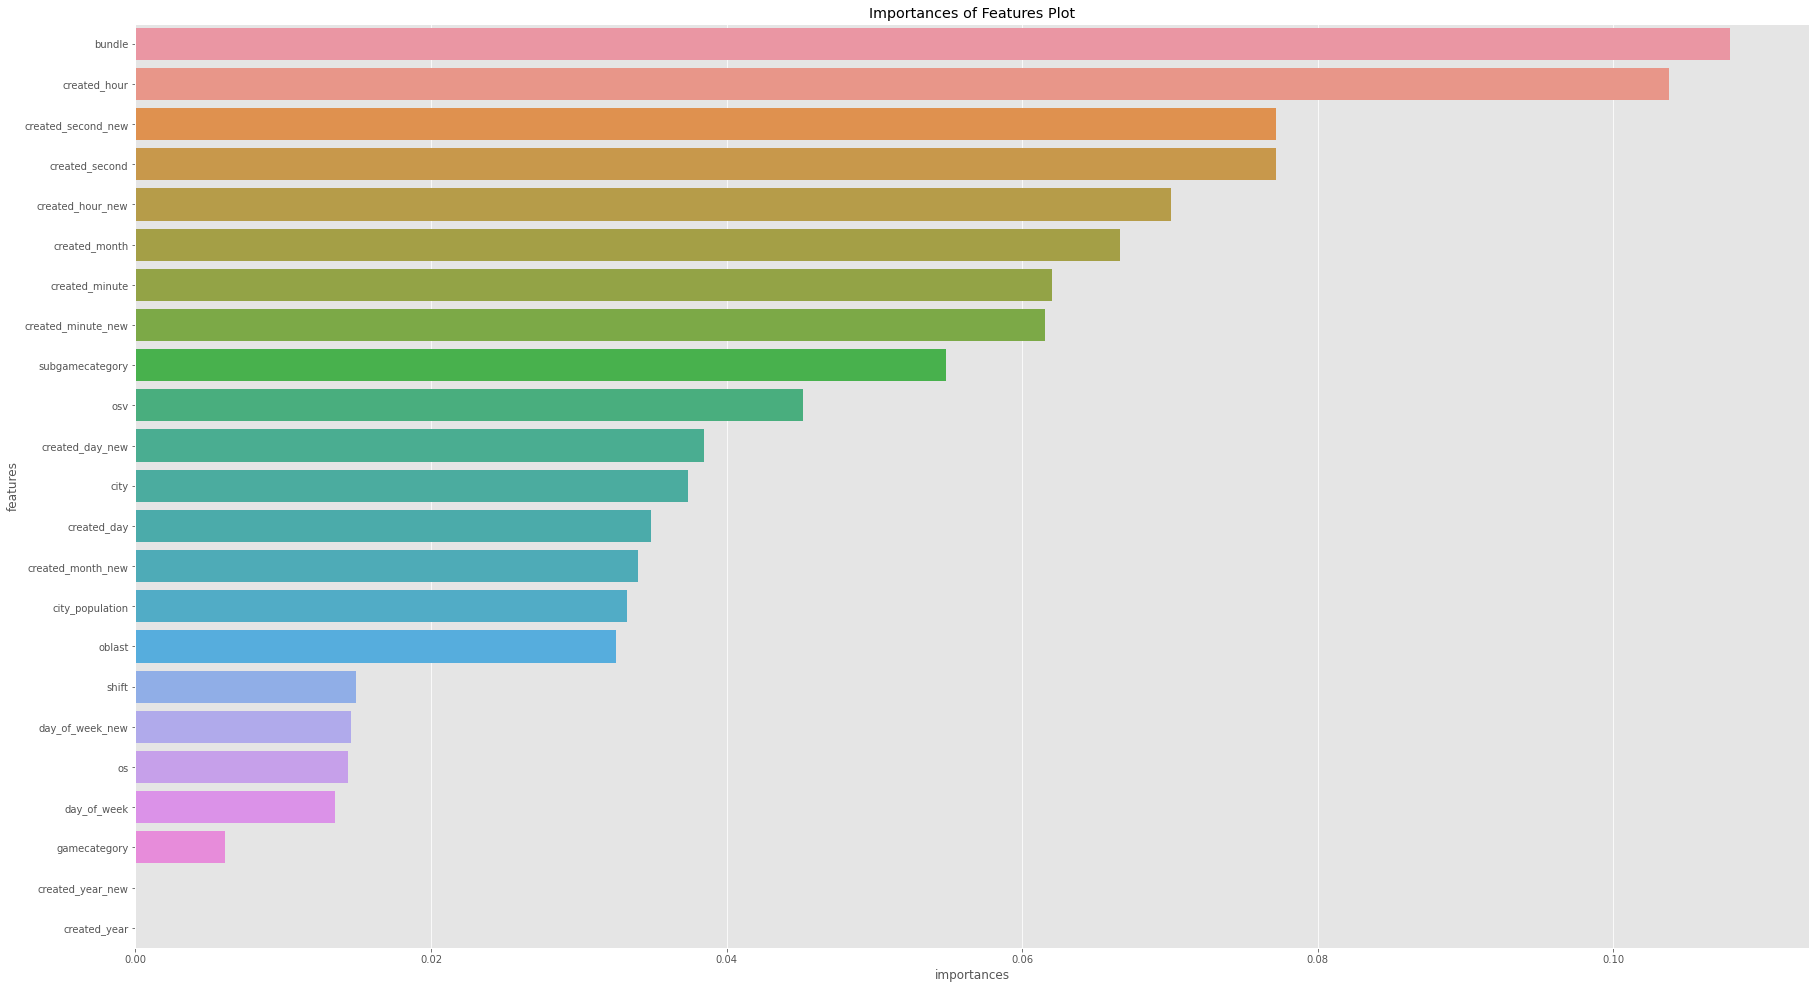

In [32]:
plt.figure(figsize=[30,17])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [33]:
df_plot.to_csv("../importence_features.csv", index=False)

In [34]:
plt.savefig("Importances_of_Features_Plot.svg")

<Figure size 432x288 with 0 Axes>

In [35]:
df.head()

,Segment,gamecategory,subgamecategory,bundle,shift,oblast,city,os,osv,created_year,...,created_second,created_year_new,created_month_new,created_day_new,created_hour_new,created_minute_new,created_second_new,day_of_week,day_of_week_new,city_population
0,4,7,39,24702,6,16,2276,0,0,2021,...,40,2021,7,6,0,7,40,0,1,-1.0
1,5,7,2,27691,0,56,1777,0,112,2021,...,29,2021,8,4,13,34,29,2,2,5028000.0
2,5,7,38,22084,0,65,46,0,100,2021,...,24,2021,9,18,9,44,24,5,5,140437.0
3,4,7,2,21701,0,39,1246,0,13,2021,...,24,2021,8,2,8,52,24,0,0,10381222.0
4,5,7,10,24046,0,56,1777,0,105,2021,...,11,2021,9,18,2,36,11,5,5,5028000.0


# First Simple Try to Learn

## GradientBoostingClassifier

In [22]:
target="Segment"
target = df.pop(target)
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)

In [23]:
train_data.head()

,gamecategory,subgamecategory,bundle,shift,oblast,city,os,osv,created_year,created_month,...,created_second,created_year_new,created_month_new,created_day_new,created_hour_new,created_minute_new,created_second_new,day_of_week,day_of_week_new,city_population
24714949,0,27,16575,0,63,1307,0,112,2021,7,...,37,2021,7,5,20,48,37,0,0,134345.0
10264384,7,0,33536,2,60,571,0,98,2021,8,...,14,2021,8,5,7,57,14,3,3,1349772.0
51703,7,30,30909,0,43,516,0,13,2021,8,...,58,2021,8,2,16,49,58,0,0,233126.0
7700213,7,12,34427,0,65,572,0,0,2021,8,...,53,2021,8,2,9,44,53,0,0,72643.0
8417781,7,38,38769,3,45,1409,0,98,2021,8,...,37,2021,8,4,11,26,37,2,2,1419007.0


In [24]:
train_data.columns

Index(['gamecategory', 'subgamecategory', 'bundle', 'shift', 'oblast', 'city',
       'os', 'osv', 'created_year', 'created_month', 'created_day',
       'created_hour', 'created_minute', 'created_second', 'created_year_new',
       'created_month_new', 'created_day_new', 'created_hour_new',
       'created_minute_new', 'created_second_new', 'day_of_week',
       'day_of_week_new', 'city_population'],
      dtype='object')

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=4, random_state=0).fit(train_data, train_labels)

KeyboardInterrupt: 

In [ ]:
predict_labels = clf.predict(test_data)

In [ ]:
print(metrics.classification_report(test_labels, predict_labels))

In [69]:
import pickle
with open('GBC_n_est10_deep5', 'wb') as f:
        pickle.dump(clf, f)

## RandomForestClassifier

In [15]:
model = ensemble.RandomForestClassifier(n_estimators=10, max_depth=50)
model.fit(train_data, train_labels)

RandomForestClassifier(max_depth=50, n_estimators=10)

In [17]:
predict_labels = model.predict(test_data)

In [18]:
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           1       0.23      0.05      0.08     77404
           2       0.43      0.40      0.41    274655
           3       0.63      0.64      0.64   2569908
           4       0.60      0.46      0.52   1311775
           5       0.75      0.83      0.79   3231230

    accuracy                           0.68   7464972
   macro avg       0.53      0.47      0.49   7464972
weighted avg       0.66      0.68      0.67   7464972



In [73]:
import pickle
with open('RFC_n_est10_deep50', 'wb') as f:
        pickle.dump(model, f)

In [ ]:
model = ensemble.RandomForestClassifier(n_estimators=10, max_depth=50)
model.fit(df, target)
import pickle
with open('RFC_n_est10_deep50_all', 'wb') as f:
        pickle.dump(model, f)

## Catboost

In [22]:
!pip install catboost

In [6]:
from catboost import CatBoostClassifier

In [7]:
model = CatBoostClassifier(iterations=10000,
                           task_type="GPU",
                           devices='0:1')

In [8]:
set(list(target))

{1, 2, 3, 4, 5}

In [9]:
model.fit(train_data,
          train_labels,
          verbose=False)

In [28]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           1       0.34      0.01      0.02     77220
           2       0.48      0.51      0.49    274437
           3       0.70      0.62      0.66   2568770
           4       0.65      0.52      0.58   1311034
           5       0.75      0.89      0.81   3233511

    accuracy                           0.71   7464972
   macro avg       0.58      0.51      0.51   7464972
weighted avg       0.70      0.71      0.70   7464972



In [ ]:
model.fit(df,
          target,
          verbose=False)

In [10]:
model.save_model("catboost_5_all")